Hábitos relacionados à Netflix

Professora Júlia Couto


*Agradecimento ao Gaurang Swarge pela disponibilização do código inicial que serviu de base para a elaboração deste notebook.*


## Data em formato Português Brasileiro
Para podermos ver os dados relacionados a data em português, primeiro temos que instalar o pacote, usando o shell.

In [ ]:
!locale -a # para listar os locales disponíveis
!sudo apt-get install language-pack-pt # instala o pacote português
# !locale -a
# reinicie o runtime

C
C.UTF-8
en_US.utf8
POSIX
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  language-pack-pt-base
The following NEW packages will be installed:
  language-pack-pt language-pack-pt-base
0 upgraded, 2 newly installed, 0 to remove and 39 not upgraded.
Need to get 2,621 kB of archives.
After this operation, 12.7 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 language-pack-pt-base all 1:18.04+20180712 [2,619 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 language-pack-pt all 1:18.04+20180712 [1,900 B]
Fetched 2,621 kB in 0s (11.1 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 2.)
debconf: falling back to frontend: Readline
debconf: unable to in


## Importação dos pacotes

In [ ]:
import numpy as np                  # arrays e matrizes multidimensionais
import pandas as pd                 # manipulação e análise de dados
import seaborn as sns               # visualização de dados
import matplotlib as mlt            # visualização de dados
import matplotlib.pyplot as plt     # visualização de dados
import io                           # entrada e saída de dados
from scipy import stats             # estatísticas
import locale                       # trabalhar com data em formato regional - PT-BR
import datetime                     # manipulação de datas
from google.colab import files      # importação de arquivos para o Colab


#Setar o local para Português Brasileiro
Após a instalação e importação dos pacotes.

In [ ]:
locale.setlocale(locale.LC_ALL, 'pt_BR.utf8')

'pt_BR.utf8'

# Abrir um arquivo que está em seu computador

O método `files.upload` retorna um dicionário dos arquivos que foram upados
A chave do dicionário é o nome, o valor do dicionário são os dados upados.
Neste link: [Snippets: Accessing files](https://colab.research.google.com/notebooks/snippets/accessing_files.ipynb), tem exemplos de como abrir arquivos de outras origens, como Google Drive e GitHub.

In [ ]:
uploaded = files.upload()

for fn in uploaded.keys():
  print('Arquivo "{name}" de tamanho {length} bytes foi adicionado.'.format(
      name=fn, length=len(uploaded[fn])))

Saving NetflixViewingHistory.csv to NetflixViewingHistory.csv
Arquivo "NetflixViewingHistory.csv" de tamanho 160062 bytes foi adicionado.


#Criação do Dataframe
Usamos o data)table do Google para mostrar as tabelas de forma mais "uncional, depois criamos um dataframe com o arquivo da Netflix. Substitua o nome "*NetflixViewingHistory.csv*" pelo nome do arquivo criado na etapa anterior.

In [ ]:
# criar dataframe
%load_ext google.colab.data_table
historico = pd.read_csv(io.BytesIO(uploaded['NetflixViewingHistory.csv']))
historico

The google.colab.data_table extension is already loaded. To reload it, use:
  %reload_ext google.colab.data_table


,Title,Date
0,Friends: Temporada 10: Aquele com o bronzeado ...,04/05/2020
1,Friends: Temporada 9: Aquele em Barbados,04/05/2020
2,Friends: Temporada 9: Aquele do doador,29/04/2020
3,Friends: Temporada 9: Aquele com o teste de fe...,29/04/2020
4,Friends: Temporada 9: Aquele com a festa da no...,29/04/2020
...,...,...
2483,TEDTalks: Números falam mais alto que palavras...,21/01/2014
2484,TEDTalks: Números falam mais alto que palavras...,21/01/2014
2485,TEDTalks: Números falam mais alto que palavras...,21/01/2014
2486,TEDTalks: Números falam mais alto que palavras...,19/01/2014


#Apresentar dados sobre o dataframe

In [ ]:
n_colunas=historico.shape[1] #número de colunas
print('Número de colunas: ', n_colunas)

n_linhas=historico.shape[0] #número de linhas
print('Número de linhas: ', n_linhas)

colunas = historico.columns
print('Nome das colunas: ', colunas)


Número de colunas:  2
Número de linhas:  2488
Nome das colunas:  Index(['Title', 'Date'], dtype='object')


## Formatação da data
Separação da data em dia, mês, ano e dia da semana.

In [ ]:
historico['Data'] = pd.to_datetime(historico['Date'],format='%d/%m/%Y')
historico['Ano'] = historico['Data'].dt.year
historico['Mês'] = historico['Data'].dt.month_name(locale='pt_BR.utf8')
historico['Dia'] = historico['Data'].dt.day
historico['Dia_da_semana'] = historico['Data'].dt.day_name(locale='pt_BR.utf8')
historico

,Title,Date,Data,Ano,Mês,Dia,Dia_da_semana
0,Friends: Temporada 10: Aquele com o bronzeado ...,04/05/2020,2020-05-04,2020,Maio,4,Segunda
1,Friends: Temporada 9: Aquele em Barbados,04/05/2020,2020-05-04,2020,Maio,4,Segunda
2,Friends: Temporada 9: Aquele do doador,29/04/2020,2020-04-29,2020,Abril,29,Quarta
3,Friends: Temporada 9: Aquele com o teste de fe...,29/04/2020,2020-04-29,2020,Abril,29,Quarta
4,Friends: Temporada 9: Aquele com a festa da no...,29/04/2020,2020-04-29,2020,Abril,29,Quarta
...,...,...,...,...,...,...,...
2483,TEDTalks: Números falam mais alto que palavras...,21/01/2014,2014-01-21,2014,Janeiro,21,Terça
2484,TEDTalks: Números falam mais alto que palavras...,21/01/2014,2014-01-21,2014,Janeiro,21,Terça
2485,TEDTalks: Números falam mais alto que palavras...,21/01/2014,2014-01-21,2014,Janeiro,21,Terça
2486,TEDTalks: Números falam mais alto que palavras...,19/01/2014,2014-01-19,2014,Janeiro,19,Domingo


#Formatação do título
Os títulos dos seriados podem ser divididos em: título, temporada e episódio.
Na sequencia, também precisamos identificar o que são filmes e o que são seriados. Depois, vamos exibir uma amostra dos  dados classificados.

In [ ]:
detalhes_seriado = historico.Title.str.split(":",expand=True,n=2)
historico['titulo'] = detalhes_seriado[0]
historico['temporada'] = detalhes_seriado[1]
historico['episodio'] = detalhes_seriado[2]
detalhes_seriado

,0,1,2
0,Friends,Temporada 10,Aquele com o bronzeado do Ross
1,Friends,Temporada 9,Aquele em Barbados
2,Friends,Temporada 9,Aquele do doador
3,Friends,Temporada 9,Aquele com o teste de fertilidade
4,Friends,Temporada 9,Aquele com a festa da novela
...,...,...,...
2483,TEDTalks,Números falam mais alto que palavras,Numeros falam mais alto que palavras: Benoit ...
2484,TEDTalks,Números falam mais alto que palavras,Numeros falam mais alto que palavras: Steven ...
2485,TEDTalks,Números falam mais alto que palavras,Numeros falam mais alto que palavras: Marcus ...
2486,TEDTalks,Números falam mais alto que palavras,Numeros falam mais alto que palavras: Stephen...


In [ ]:
#Se a coluna temporada estiver "None" provavelmente é um filme Filme, vamos adicionar outra coluna ao dataframe
#historico[historico['temporada'].isna()]
historico['tipo'] = historico.apply(lambda x:'Filme' if pd.isnull(x['temporada']) else 'Seriado' , axis=1)
historico

,Title,Date,Data,Ano,Mês,Dia,Dia_da_semana,titulo,temporada,episodio,tipo
0,Friends: Temporada 10: Aquele com o bronzeado ...,04/05/2020,2020-05-04,2020,Maio,4,Segunda,Friends,Temporada 10,Aquele com o bronzeado do Ross,Seriado
1,Friends: Temporada 9: Aquele em Barbados,04/05/2020,2020-05-04,2020,Maio,4,Segunda,Friends,Temporada 9,Aquele em Barbados,Seriado
2,Friends: Temporada 9: Aquele do doador,29/04/2020,2020-04-29,2020,Abril,29,Quarta,Friends,Temporada 9,Aquele do doador,Seriado
3,Friends: Temporada 9: Aquele com o teste de fe...,29/04/2020,2020-04-29,2020,Abril,29,Quarta,Friends,Temporada 9,Aquele com o teste de fertilidade,Seriado
4,Friends: Temporada 9: Aquele com a festa da no...,29/04/2020,2020-04-29,2020,Abril,29,Quarta,Friends,Temporada 9,Aquele com a festa da novela,Seriado
...,...,...,...,...,...,...,...,...,...,...,...
2483,TEDTalks: Números falam mais alto que palavras...,21/01/2014,2014-01-21,2014,Janeiro,21,Terça,TEDTalks,Números falam mais alto que palavras,Numeros falam mais alto que palavras: Benoit ...,Seriado
2484,TEDTalks: Números falam mais alto que palavras...,21/01/2014,2014-01-21,2014,Janeiro,21,Terça,TEDTalks,Números falam mais alto que palavras,Numeros falam mais alto que palavras: Steven ...,Seriado
2485,TEDTalks: Números falam mais alto que palavras...,21/01/2014,2014-01-21,2014,Janeiro,21,Terça,TEDTalks,Números falam mais alto que palavras,Numeros falam mais alto que palavras: Marcus ...,Seriado
2486,TEDTalks: Números falam mais alto que palavras...,19/01/2014,2014-01-19,2014,Janeiro,19,Domingo,TEDTalks,Números falam mais alto que palavras,Numeros falam mais alto que palavras: Stephen...,Seriado


In [ ]:
print('\nAmostra\n',historico.sample(15))


Amostra
                                                   Title        Date  \
2285  Orange Is the New Black: Temporada 2: Saída te...  11/12/2014   
1060              Scandal: Temporada 4: O último jantar  18/02/2017   
434           Brooklyn Nine-Nine: Temporada 1: 48 horas  15/07/2018   
2145  America's Next Top Model: Temporada 18: J. Ale...  27/06/2015   
2286  Orange Is the New Black: Temporada 2: Presas f...  11/12/2014   
823                The Affair: Temporada 1: Episódio 10  04/11/2017   
11     Friends: Temporada 9: Aquele em que Monica canta  24/04/2020   
249            Insatiable: Temporada 1: Santa rosquinha  28/01/2019   
1901  Um maluco no pedaço: Temporada 6: Fim da linha...  18/12/2015   
469                                   Corações de Ferro  03/06/2018   
834             Suits: Temporada 6: Balançar as árvores  28/10/2017   
264   Grace and Frankie: Temporada 4: A casa de repouso  19/01/2019   
2352           The Borgias: Temporada 2: Uma bela farsa  14/02/2014

#Comparação dos três anos mais recentes
Agora vamos dividir o dataset em 3, para compararmos os anos de 2018, 2019 e 2020:
* df2018
* df2019
* df2020

Vamos imprimir o ano de 2020 para validação.

In [ ]:
df2018=historico[historico['Ano'] == 2018]
df2019=historico[historico['Ano'] == 2019]
df2020=historico[historico['Ano'] == 2020]
df2020

,Title,Date,Data,Ano,Mês,Dia,Dia_da_semana,titulo,temporada,episodio,tipo
0,Friends: Temporada 10: Aquele com o bronzeado ...,04/05/2020,2020-05-04,2020,Maio,4,Segunda,Friends,Temporada 10,Aquele com o bronzeado do Ross,Seriado
1,Friends: Temporada 9: Aquele em Barbados,04/05/2020,2020-05-04,2020,Maio,4,Segunda,Friends,Temporada 9,Aquele em Barbados,Seriado
2,Friends: Temporada 9: Aquele do doador,29/04/2020,2020-04-29,2020,Abril,29,Quarta,Friends,Temporada 9,Aquele do doador,Seriado
3,Friends: Temporada 9: Aquele com o teste de fe...,29/04/2020,2020-04-29,2020,Abril,29,Quarta,Friends,Temporada 9,Aquele com o teste de fertilidade,Seriado
4,Friends: Temporada 9: Aquele com a festa da no...,29/04/2020,2020-04-29,2020,Abril,29,Quarta,Friends,Temporada 9,Aquele com a festa da novela,Seriado
...,...,...,...,...,...,...,...,...,...,...,...
158,Friends: Temporada 4: Aquele da festa de despe...,05/01/2020,2020-01-05,2020,Janeiro,5,Domingo,Friends,Temporada 4,Aquele da festa de despedida,Seriado
159,Friends: Temporada 4: Aquele do rugby,05/01/2020,2020-01-05,2020,Janeiro,5,Domingo,Friends,Temporada 4,Aquele do rugby,Seriado
160,Friends: Temporada 4: Aquele sobre o dia sujo ...,05/01/2020,2020-01-05,2020,Janeiro,5,Domingo,Friends,Temporada 4,Aquele sobre o dia sujo do Joey,Seriado
161,Friends: Temporada 4: Aquele com a paquera da ...,05/01/2020,2020-01-05,2020,Janeiro,5,Domingo,Friends,Temporada 4,Aquele com a paquera da Rachel,Seriado


In [ ]:
df2018

,Title,Date,Data,Ano,Mês,Dia,Dia_da_semana,titulo,temporada,episodio,tipo
265,Brooklyn Nine-Nine: Temporada 1: Festa de aniv...,06/12/2018,2018-12-06,2018,Dezembro,6,Quinta,Brooklyn Nine-Nine,Temporada 1,Festa de aniversário,Seriado
266,Friends: Temporada 6: Aquele com o Porsche do ...,28/11/2018,2018-11-28,2018,Novembro,28,Quarta,Friends,Temporada 6,Aquele com o Porsche do Joey,Seriado
267,Friends: Temporada 6: Aquele em que Joey perde...,28/11/2018,2018-11-28,2018,Novembro,28,Quarta,Friends,Temporada 6,Aquele em que Joey perde o seguro,Seriado
268,Friends: Temporada 6: Aquele em que Ross abraç...,28/11/2018,2018-11-28,2018,Novembro,28,Quarta,Friends,Temporada 6,Aquele em que Ross abraça Rachel,Seriado
269,Friends: Temporada 6: Aquele depois de Vegas,28/11/2018,2018-11-28,2018,Novembro,28,Quarta,Friends,Temporada 6,Aquele depois de Vegas,Seriado
...,...,...,...,...,...,...,...,...,...,...,...
727,The Windsors: Temporada 1: Episódio 5,05/01/2018,2018-01-05,2018,Janeiro,5,Sexta,The Windsors,Temporada 1,Episódio 5,Seriado
728,A Segunda Guerra em Cores: World War II in Col...,03/01/2018,2018-01-03,2018,Janeiro,3,Quarta,A Segunda Guerra em Cores,World War II in Colour,Mediterrâneo e Norte da África,Seriado
729,A Segunda Guerra em Cores: World War II in Col...,03/01/2018,2018-01-03,2018,Janeiro,3,Quarta,A Segunda Guerra em Cores,World War II in Colour,Vitória na Europa,Seriado
730,The Crown: Temporada 1: Orgulho e Alegria,02/01/2018,2018-01-02,2018,Janeiro,2,Terça,The Crown,Temporada 1,Orgulho e Alegria,Seriado


#Visualizações

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

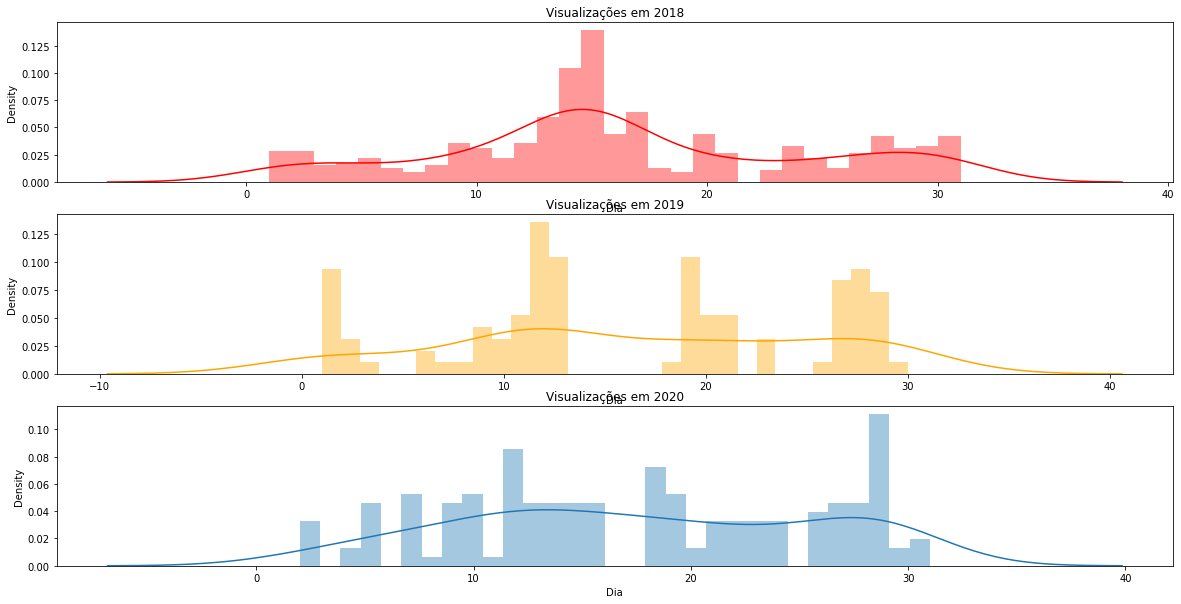

In [ ]:
#Visualizações por Dia do mês
plt.figure(figsize=(20,10))
plt.subplot(3,1,1)
plt.title("Visualizações em 2018")
ax = sns.distplot(df2018['Dia'],bins=31,color="red",hist=True)
plt.subplot(3,1,2)
plt.title("Visualizações em 2019")
ax = sns.distplot(df2019['Dia'],bins=31, color="orange",hist=True)
plt.subplot(3,1,3)
plt.title("Visualizações em 2020")
ax = sns.distplot(df2020['Dia'],bins=31,hist=True)

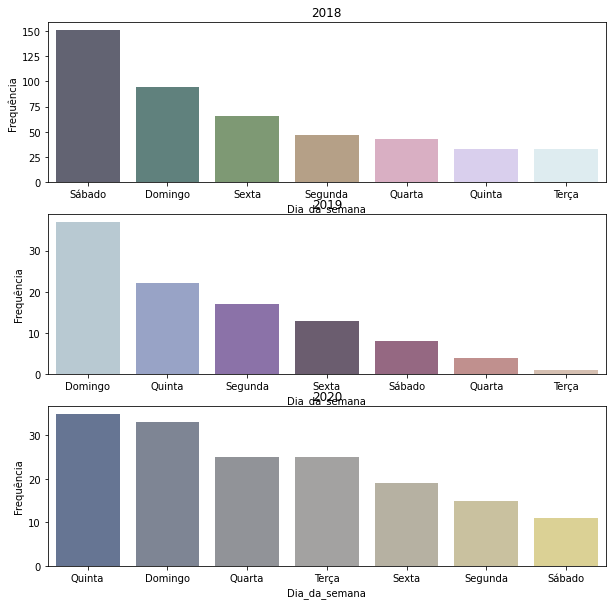

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(3,1,1)
ax = sns.barplot(x=df2018["Dia_da_semana"].value_counts().index, y=df2018["Dia_da_semana"].value_counts(), palette="cubehelix",alpha=0.7)
plt.title("2018")
plt.xlabel("Dia_da_semana")
plt.ylabel("Frequência")

plt.subplot(3,1,2)
ax = sns.barplot(x=df2019["Dia_da_semana"].value_counts().index, y=df2019["Dia_da_semana"].value_counts(),palette="twilight",alpha=0.7)
plt.title("2019")
plt.xlabel("Dia_da_semana")
plt.ylabel("Frequência")

plt.subplot(3,1,3)
ax = sns.barplot(x=df2020["Dia_da_semana"].value_counts().index, y=df2020["Dia_da_semana"].value_counts(),palette="cividis",alpha=0.7)
plt.title("2020")
plt.xlabel("Dia_da_semana")
plt.ylabel("Frequência")
plt.savefig('02-Diario.png')


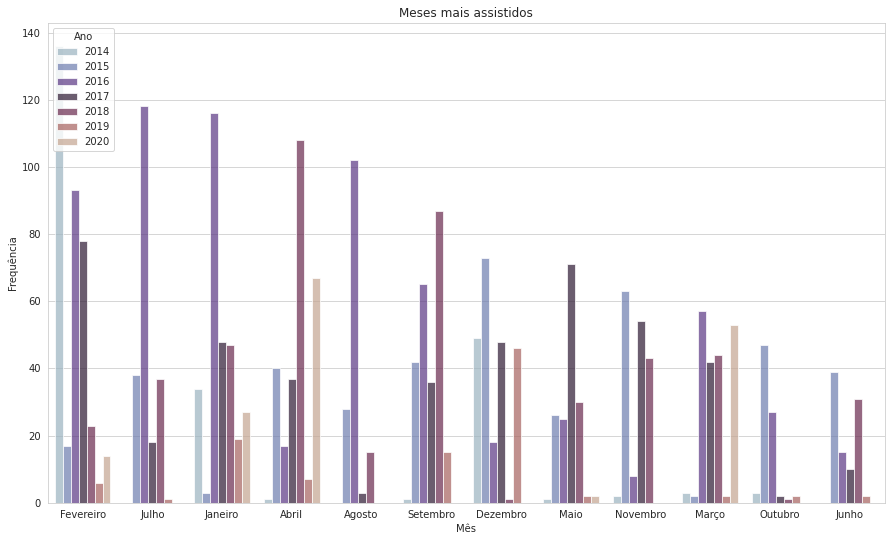

In [ ]:
sns.set_style('whitegrid')
by_year = historico.groupby('Mês')['Ano'].value_counts().sort_values(ascending=False).reset_index(name='Frequência')
plt.figure(figsize=(15,30))
plt.subplot(3,1,1)
ax = sns.barplot(x=by_year["Mês"], y=by_year["Frequência"], hue=by_year["Ano"], palette="twilight",alpha=0.7)
plt.title("Meses mais assistidos")

plt.savefig('03-PorMes.png')

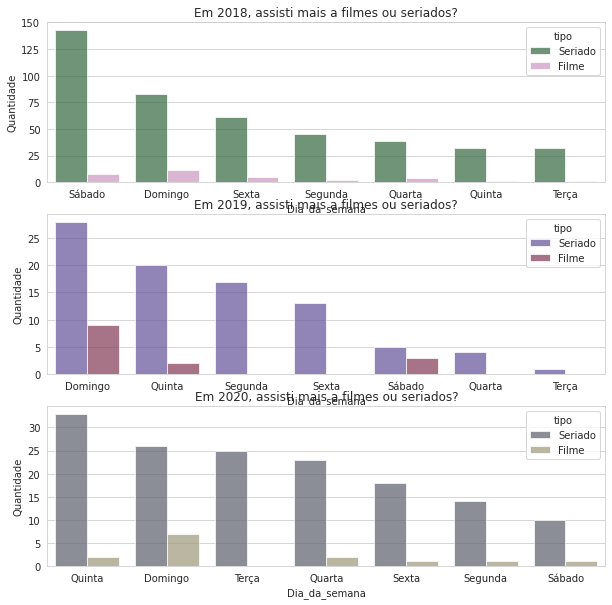

In [ ]:
#quando assistimos Filmes e Seriados
sns.set_style('whitegrid')

show_freq = df2018.groupby('tipo')['Dia_da_semana'].value_counts().sort_values(ascending=False).reset_index(name='Quantidade')
plt.figure(figsize=(10,10))
plt.subplot(3,1,1)
ax = sns.barplot(x=show_freq["Dia_da_semana"], y=show_freq["Quantidade"], hue=show_freq["tipo"], palette="cubehelix",alpha=0.7)
plt.title("Em 2018, assisti mais a filmes ou seriados?")

show_freq = df2019.groupby('tipo')['Dia_da_semana'].value_counts().sort_values(ascending=False).reset_index(name='Quantidade')
plt.subplot(3,1,2)
ax = sns.barplot(x=show_freq["Dia_da_semana"], y=show_freq["Quantidade"], hue=show_freq["tipo"], palette="twilight",alpha=0.7)
plt.title("Em 2019, assisti mais a filmes ou seriados?")

show_freq = df2020.groupby('tipo')['Dia_da_semana'].value_counts().sort_values(ascending=False).reset_index(name='Quantidade')
plt.subplot(3,1,3)
ax = sns.barplot(x=show_freq["Dia_da_semana"], y=show_freq["Quantidade"], hue=show_freq["tipo"], palette="cividis",alpha=0.7)
plt.title("Em 2020, assisti mais a filmes ou seriados?")

plt.savefig('04-FilmeVStvshow.png')

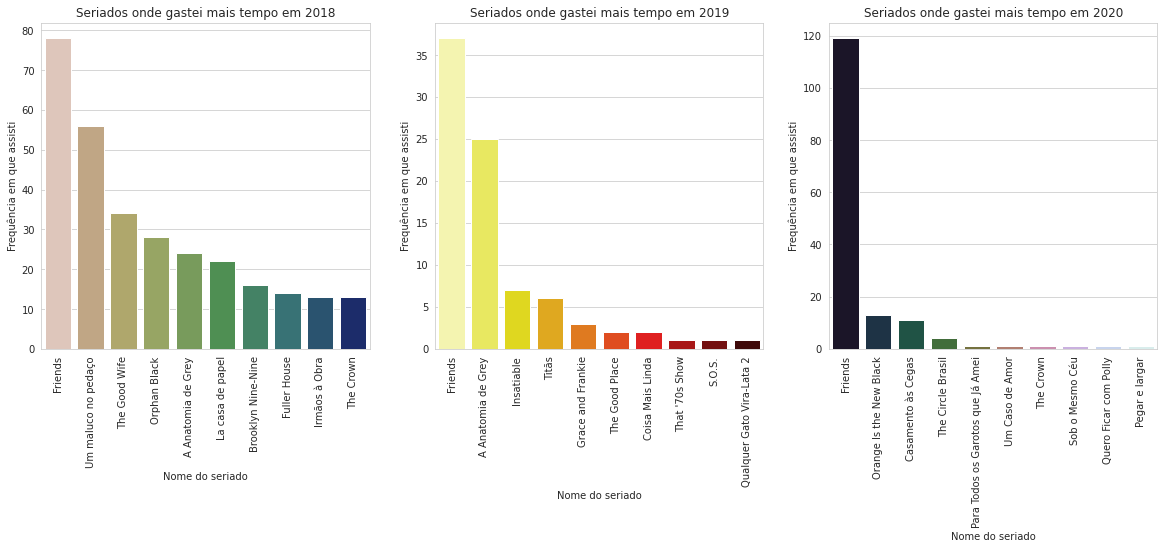

In [ ]:
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
ax = sns.barplot(x=df2018['titulo'].sort_values(ascending=True).value_counts().index[:10],
                 y=df2018["titulo"].sort_values(ascending=True).value_counts()[:10],
                 palette="gist_earth_r")
plt.title("Seriados onde gastei mais tempo em 2018")
plt.xlabel("Nome do seriado")
plt.ylabel("Frequência em que assisti")
loc, labels = plt.xticks()
ax.set_xticklabels(labels, rotation=90)

plt.subplot(1,3,2)
ax = sns.barplot(x=df2019['titulo'].sort_values(ascending=True).value_counts().index[:10],
                 y=df2019["titulo"].sort_values(ascending=True).value_counts()[:10],
                 palette="hot_r")
plt.title("Seriados onde gastei mais tempo em 2019")
plt.xlabel("Nome do seriado")
plt.ylabel("Frequência em que assisti")
loc, labels = plt.xticks()
ax.set_xticklabels(labels, rotation=90)

plt.subplot(1,3,3)
ax = sns.barplot(x=df2020['titulo'].sort_values(ascending=True).value_counts().index[:10],
                 y=df2020["titulo"].sort_values(ascending=True).value_counts()[:10],
                 palette="cubehelix")
plt.title("Seriados onde gastei mais tempo em 2020")
plt.xlabel("Nome do seriado")
plt.ylabel("Frequência em que assisti")
loc, labels = plt.xticks()
ax.set_xticklabels(labels, rotation=90)
plt.savefig('05-mais assistidos.png')


Text(0, 0.5, 'Frequência')

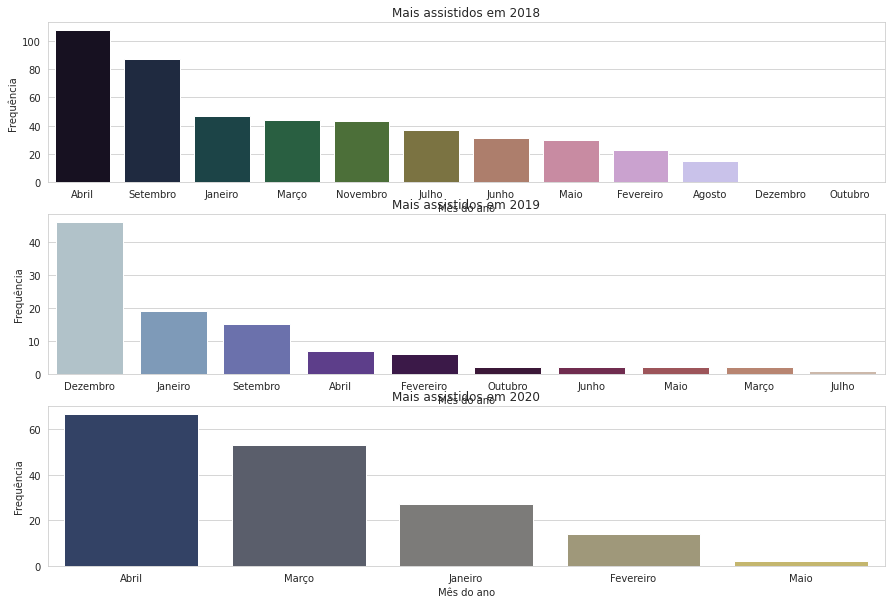

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(3,1,1)
ax = sns.barplot(x=df2018["Mês"].value_counts().index, y=df2018["Mês"].value_counts(), palette="cubehelix")
plt.title("Mais assistidos em 2018")
plt.xlabel("Mês do ano")
plt.ylabel("Frequência")

plt.subplot(3,1,2)
ax = sns.barplot(x=df2019["Mês"].value_counts().index, y=df2019["Mês"].value_counts(), palette="twilight")
plt.title("Mais assistidos em 2019")
plt.xlabel("Mês do ano")
plt.ylabel("Frequência")

plt.subplot(3,1,3)
ax = sns.barplot(x=df2020["Mês"].value_counts().index, y=df2020["Mês"].value_counts(), palette="cividis")
plt.title("Mais assistidos em 2020")
plt.xlabel("Mês do ano")
plt.ylabel("Frequência")

#Trabalho 1

1. Faça download dos seus dados da Netflix e use para executar esse código. Caso não queira usar seus dados, altere o arquivo de exemplo de forma substancial, para que **todas as visualizações fiquem diferentes**.
2. Edite o código para mostrar os resultados referentes ao novo conjunto de dados nos últimos 4 anos (2019, 2020, 2021, 2022).
3. Com base no dataframe completo (não separado por anos) e usando Python, identifique:
* a moda para os atributos Ano, Mês, Dia, Dia_da_semana, Título.
* a frequência de todos os valores possíveis para os atributos Ano, Mês, Dia, Dia_da_semana, tipo
* os valores mínimo, máximo e o intervalo para os atributos Ano, Mês, Dia, Dia_da_semana,
4. Faça uma análise textual de um parágrafo para cada uma das visualizações geradas.
5. Faça uma análise de correlação entre dois atributos. Qual o valor de correlação?
- Imprima um gráfico de dispersão
- O que você consegue identificar a partir do gráfico e do valor de correlação entre os dois atributos?
6. Use a técnica de codificação 1-de n para os dias da semana, e mostre o código e como ficaria a codificação para cada dia.


Postar um arquivo .ipynb e o arquivo fonte no Moodle, até dia 11-04.

